In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Import dataset
df = pd.read_csv("fishstockingdataforrecreationalfishingpurposes_2021-01-07.csv", encoding = "ISO-8859-1", low_memory=False)
display(df)

,MNRF District,Stocking Year,Species,Unoffcial Waterbody Name,Official Waterbody Name,Official French Waterbody Name,Geographic Township,Waterbody Location ID,Latitude,Longitude,Developmental Stage,Number of Fish Stocked
0,Algonquin Park Zone - Ontario Parks,2011.0,Brook Trout,Bluff L.,NaN,NaN,SPROULE,17-7086-50512,45.58,-78.32,Yearlings,1300.0
1,Algonquin Park Zone - Ontario Parks,2011.0,Brook Trout,Cecil L.,Cecil Lake,lac Cecil,LAWRENCE,17-6955-50358,45.45,-78.47,Yearlings,400.0
2,Algonquin Park Zone - Ontario Parks,2011.0,Brook Trout,Farm B. L.,Farm Bay Lake,lac Farm Bay,NIGHTINGALE,17-7094-50386,45.47,-78.32,Yearlings,1200.0
3,Algonquin Park Zone - Ontario Parks,2011.0,Brook Trout,Leaf L.,Leaf Lake,lac Leaf,AIRY,17-7107-50492,45.55,-78.29,Yearlings,700.0
4,Algonquin Park Zone - Ontario Parks,2011.0,Brook Trout,Length L.,Length Lake,lac Length,STRATTON,18-2931-50814,45.85,-77.66,Yearlings,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13542,Wawa District,2020.0,Splake,Selkirk L.,NaN,NaN,FIDDLER,16-6867-53301,48.09,-84.49,Yearlings,700.0
13543,Wawa District,2020.0,Splake,Shook L.,Shook Lake,lac Shook,LASTHEELS,16-6740-53206,48.01,-84.66,Yearlings,1000.0
13544,Wawa District,2020.0,Splake,Souloup L.,Souloup Lake,lac Souloup,DUMAS,16-6692-53541,48.31,-84.71,Yearlings,1000.0
13545,Wawa District,2020.0,Splake,Swanson L.,Swanson Lake,lac Swanson,BIRD,16-7005-53455,48.22,-84.30,Yearlings,2000.0


In [ ]:
# Clean data
df_year_species_numb = df[['Stocking Year', 'Species', 'Number of Fish Stocked']] 
df_year_species_numb['Stocking Year'] = df_year_species_numb['Stocking Year'].apply(np.int64)
df_year_species_numb['Number of Fish Stocked'] = df_year_species_numb['Number of Fish Stocked'].apply(np.int64)

display(df_year_species_numb)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Stocking Year,Species,Number of Fish Stocked
0,2011,Brook Trout,1300
1,2011,Brook Trout,400
2,2011,Brook Trout,1200
3,2011,Brook Trout,700
4,2011,Brook Trout,3500
...,...,...,...
13542,2020,Splake,700
13543,2020,Splake,1000
13544,2020,Splake,1000
13545,2020,Splake,2000


In [ ]:
# Groupby 'Stocking Year' and 'Species'
df_groupby_year_species = df_year_species_numb.groupby(["Stocking Year", "Species"])["Number of Fish Stocked"].sum().unstack().fillna(0).apply(np.int64)
df_groupby_year_species

Species,Atlantic Salmon,Aurora Trout,Brook Trout,Brown Trout,Chinook Salmon,Lake Whitefish,Lake Trout,Rainbow Trout,Splake,Walleye
Stocking Year,,,,,,,,,,
2011,0,25322,988405,280069,0,142880,318049,369622,590990,187547
2012,0,27412,997511,265434,491516,139106,225338,356817,612235,35250
2013,0,0,863717,273817,588647,123865,385884,255102,548393,42774
2014,0,400,995279,262267,492247,146055,410647,292191,599839,23567
2015,0,48222,723972,295022,440549,145219,346184,378295,492351,75722
2016,25004,136,952410,269766,308190,140908,427526,200624,570464,136554
2017,0,22505,852157,249799,260506,106310,266895,392686,633678,105001
2018,416,15716,1068358,250405,196554,144376,250482,386423,588145,66743
2019,597,3895,813495,245783,203040,140981,362904,356251,519895,160607


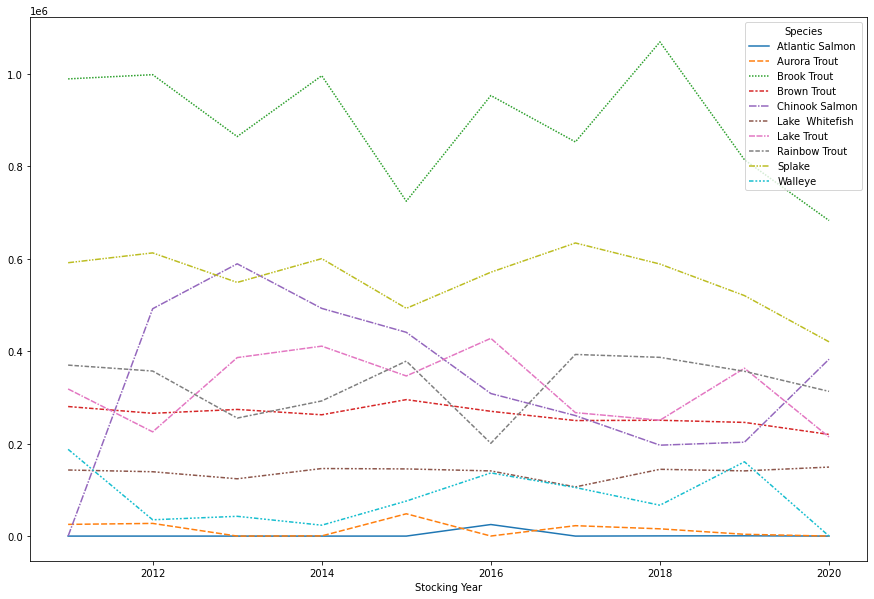

In [ ]:
# Display line plot
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_groupby_year_species) 
plt.show()

In [ ]:
# Export CSV
df_groupby_year_species.to_csv('groupby_year_species.csv', index=True)